### Loan Prediction

This project seeks to build a machine learning model that predicts a user's eligibility for loan approval. The dataset is an open-source dataset acquired from kaggle.com. This project seeks to demonstrate how loan classification models are built.

https://www.kaggle.com/datasets/zhijinzhai/loandata

#### Details

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

##### Data Dictionary

Loan_id A unique loan number assigned to each loan customers

Loan_status Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal Basic principal loan amount at the origination

terms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date When the loan got originated and took effects

Due_date Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time The actual time a customer pays off the loan

Pastdue_days How many days a loan has been past due

Age, education, gender A customer’s basic demographic information

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Loan payments data.csv")

In [3]:
# Classes of loan's status
df.loan_status.unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

Our target class/dependent variable in this project is the 'loan status' while the other classes will be considered independent variables

In [4]:
# A preview of the dataset
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


First step will be to drop the Loan_ID, since by definition, it has very little to do with our dependent variable.

In [5]:
df.drop('Loan_ID', axis=1, inplace=True)

In [6]:
df

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


We now discover that there are about three columns that should be datetime features. They are; effevtive_date, due_date, paid_off_time

In [7]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     500 non-null    object        
 1   Principal       500 non-null    int64         
 2   terms           500 non-null    int64         
 3   effective_date  500 non-null    datetime64[ns]
 4   due_date        500 non-null    datetime64[ns]
 5   paid_off_time   400 non-null    datetime64[ns]
 6   past_due_days   200 non-null    float64       
 7   age             500 non-null    int64         
 8   education       500 non-null    object        
 9   Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 39.2+ KB


In [9]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


Moving forward, since a feature called 'past_due_days'(which is the amount of days taken between the due_date and paid_off_time) already exists, I will drop them as well as the effective date

In [10]:
df.drop(['paid_off_time'
        ,'effective_date',
        'due_date'], axis=1, inplace=True)

In [11]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [12]:
# Tabular structure of data (rows and columns)
df.shape

(500, 7)

In [13]:
# Sum of null values
df.isna().sum()

loan_status        0
Principal          0
terms              0
past_due_days    300
age                0
education          0
Gender             0
dtype: int64

it seems the null values in the dataset belong to the people who paid off their loans before due date. I will handle that in a moment. Next, I want to convert the object data types into categorical data types so as to be able to conduct proper analysis on them

In [14]:
data = pd.get_dummies(df)

In [15]:
data.head()

,Principal,terms,past_due_days,age,loan_status_COLLECTION,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,1000,30,NaN,45,0,0,1,0,1,0,0,0,1
1,1000,30,NaN,50,0,0,1,1,0,0,0,1,0
2,1000,30,NaN,33,0,0,1,1,0,0,0,1,0
3,1000,15,NaN,27,0,0,1,0,0,0,1,0,1
4,1000,30,NaN,28,0,0,1,0,0,0,1,1,0


In [16]:
data.drop([
    'loan_status_COLLECTION',
    'loan_status_COLLECTION_PAIDOFF',
    'loan_status_PAIDOFF'
], axis=1, inplace = True)

In [17]:
data['target'] = df.loan_status

In [18]:
data

,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,target
0,1000,30,NaN,45,0,1,0,0,0,1,PAIDOFF
1,1000,30,NaN,50,1,0,0,0,1,0,PAIDOFF
2,1000,30,NaN,33,1,0,0,0,1,0,PAIDOFF
3,1000,15,NaN,27,0,0,0,1,0,1,PAIDOFF
4,1000,30,NaN,28,0,0,0,1,1,0,PAIDOFF
...,...,...,...,...,...,...,...,...,...,...,...
495,1000,30,3.0,28,0,1,0,0,0,1,COLLECTION_PAIDOFF
496,1000,15,14.0,26,0,1,0,0,0,1,COLLECTION_PAIDOFF
497,800,15,3.0,30,0,0,0,1,0,1,COLLECTION_PAIDOFF
498,1000,30,1.0,38,0,0,0,1,1,0,COLLECTION_PAIDOFF


Its visible that our null values in the dataset belong to customers who paid off on time, we will replace that with 0

In [19]:
data.fillna(0, inplace=True)

Categorizing the target variable

In [20]:
data.target = data['target'].astype('category')

In [21]:
data.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: target
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 764.0 bytes


In [22]:
data.target = data.target.cat.codes

In [23]:
data.target.unique()

array([2, 0, 1], dtype=int8)

Here, 2 = Paidoff, 1=Collection_paidOff, 0 = Collection

In [24]:
data.describe()

,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000
mean,943.200000,22.824000,14.404000,31.116000,0.134000,0.418000,0.008000,0.440000,0.15400,0.84600,1.400000
std,115.240274,8.000064,25.614312,6.084784,0.340993,0.493724,0.089173,0.496884,0.36131,0.36131,0.800801
min,300.000000,7.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,1000.000000,15.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000
50%,1000.000000,30.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,2.000000
75%,1000.000000,30.000000,12.000000,35.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000,2.000000
max,1000.000000,30.000000,76.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,2.000000


In [25]:
data.head()

,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,target
0,1000,30,0.0,45,0,1,0,0,0,1,2
1,1000,30,0.0,50,1,0,0,0,1,0,2
2,1000,30,0.0,33,1,0,0,0,1,0,2
3,1000,15,0.0,27,0,0,0,1,0,1,2
4,1000,30,0.0,28,0,0,0,1,1,0,2


<Axes: >

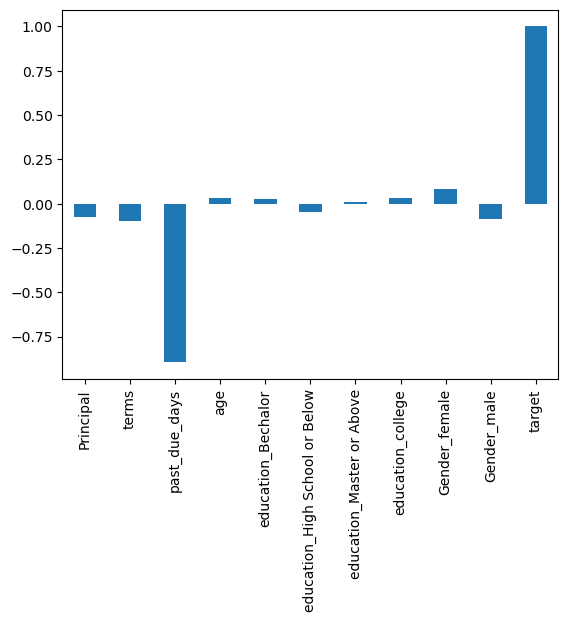

In [26]:
data.corrwith(data.target).plot(kind='bar')

Here, we see that there's an almost perfectly negative correlation between past_due_days and our target, Which shows that the lesser the past due days, the higher the chance of the user paying back the loan.

In [27]:
# split data
X = data.drop(['target', 'past_due_days'], axis=1)
y = data.target

<Axes: >

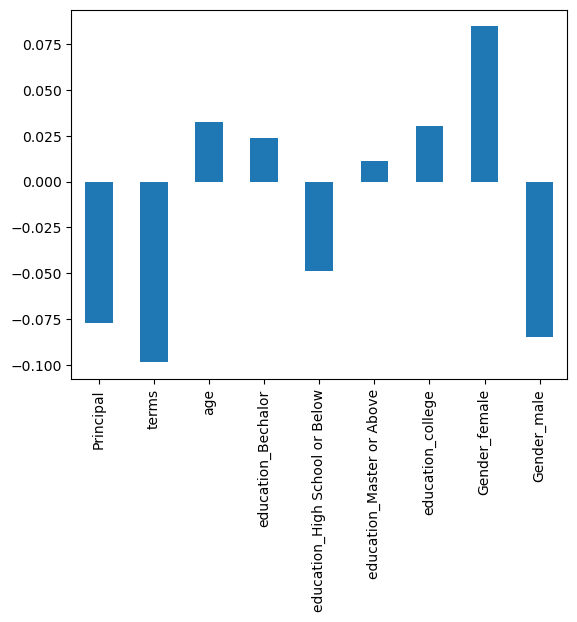

In [28]:
X.corrwith(y).plot(kind='bar')

The following have a negative correlation with the target.
Principal, terms, Education(High school/above), Gender(male)
while age, education (bachelor's, masters and college), Gender(female) have a positive correlation with the target.

With factors like Principal, terms, Gender being the most defining factors

Population analysis

<Axes: >

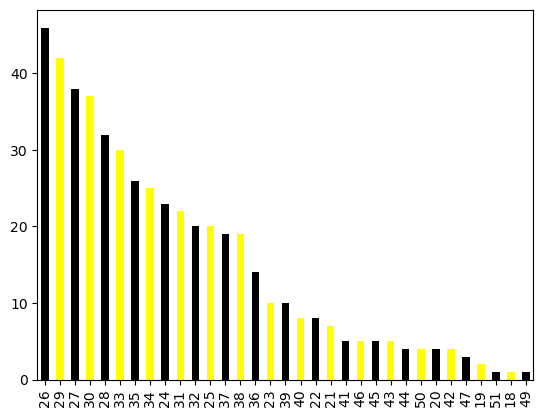

In [29]:
# Age Range of users
X.age.value_counts().plot(kind='bar', color=['black', 'yellow'])

Most users fall between the ages of 24 - 35

In [30]:
X.describe()[['Principal', 'terms', 'age']]

,Principal,terms,age
count,500.000000,500.000000,500.000000
mean,943.200000,22.824000,31.116000
std,115.240274,8.000064,6.084784
min,300.000000,7.000000,18.000000
25%,1000.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


<Axes: >

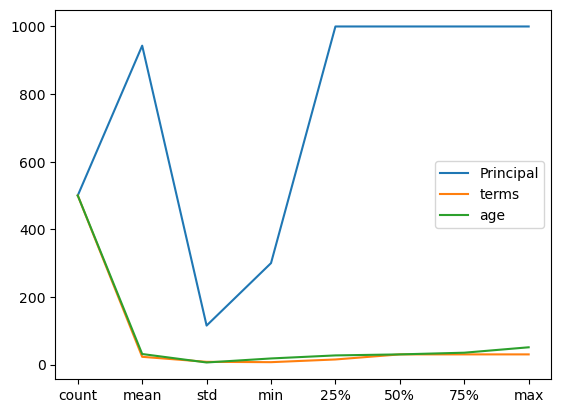

In [31]:
X.describe()[['Principal', 'terms', 'age']].plot()

There seems to be a positive correlation between age and terms

<Axes: xlabel='age'>

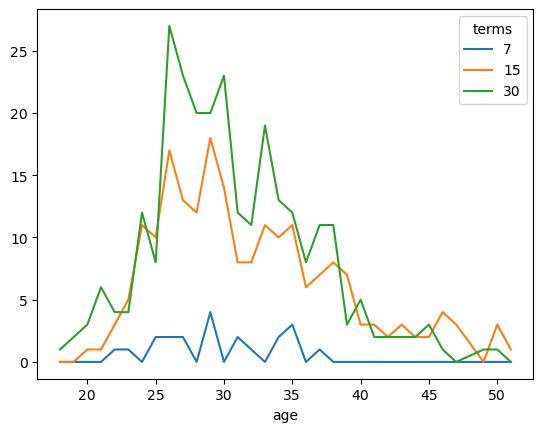

In [32]:
pd.crosstab(X.terms, X.age).T.plot()

The chart above is slightly skewed to the right, demonstrating that the lending class who take 30 days are between ages 25 to 35. With the mean being around 30/31

In [33]:
X.terms.value_counts()

30    272
15    207
7      21
Name: terms, dtype: int64

only 21 people have used the 7 days term, 207 have used 15 days, and 272 have used 30 days

### Exploratory Conclusion

We have identified that the longer it takes a user to pay back, the lesser their chances of payback, male users tend to default than female users do, the borrowing class is mostly between the age range of 24 - 35, with the mean age being 30/31. People who only have high school education or higher tend to default. However, people who went to college and above tend to not default loan payment.

### Predictive Model

Going forward, I will convert the target classes from three classes to two, since we are trying to predict if  a loan should be approved, it'd be much more suitable to have a target class with just yes and no.

In [34]:
y.replace({2: 1, 1: 0}, inplace=True)

In [35]:
y.unique()

array([1, 0], dtype=int8)

In [38]:
y.head(), y.tail()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int8,
 495    0
 496    0
 497    0
 498    0
 499    0
 Name: target, dtype: int8)

In [39]:
y.value_counts()

1    300
0    200
Name: target, dtype: int64

We have a fairly balanced set of classes.

The next step will be to standardize the dataset for the ml model

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()

In [44]:
X_trans = scale.fit_transform(X)

In [49]:
Xt = pd.DataFrame(X_trans, columns=X.columns)

In [50]:
Xt

,Principal,terms,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,0.493377,0.897891,2.284043,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
1,0.493377,0.897891,3.106587,2.542181,-0.847475,-0.089803,-0.886405,2.343823,-2.343823
2,0.493377,0.897891,0.309935,2.542181,-0.847475,-0.089803,-0.886405,2.343823,-2.343823
3,0.493377,-0.978972,-0.677119,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653
4,0.493377,0.897891,-0.512610,-0.393363,-0.847475,-0.089803,1.128152,2.343823,-2.343823
...,...,...,...,...,...,...,...,...,...
495,0.493377,0.897891,-0.512610,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
496,0.493377,-0.978972,-0.841628,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
497,-1.243866,-0.978972,-0.183592,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653
498,0.493377,0.897891,1.132480,-0.393363,-0.847475,-0.089803,1.128152,2.343823,-2.343823


In [66]:
Xtrain, ytrain = Xt.head(250),  y.head(250)
Xval, yval = Xt[250:350], y[250:350]
Xtest, ytest = Xt.tail(150), y.tail(150)

I will begin with a logistic regression and see how well it does with the dataset

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score, auc, roc_curve

In [53]:
lr = LogisticRegression(random_state=23)

In [54]:
lr.fit(Xtrain, ytrain)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

With the above error, it's clear the dataset classes are not randomized across. we'd seek to do that now by going back to the separation point and conduct a random sampling of the population.

In [56]:
data

,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,target
0,1000,30,0.0,45,0,1,0,0,0,1,1
1,1000,30,0.0,50,1,0,0,0,1,0,1
2,1000,30,0.0,33,1,0,0,0,1,0,1
3,1000,15,0.0,27,0,0,0,1,0,1,1
4,1000,30,0.0,28,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1000,30,3.0,28,0,1,0,0,0,1,0
496,1000,15,14.0,26,0,1,0,0,0,1,0
497,800,15,3.0,30,0,0,0,1,0,1,0
498,1000,30,1.0,38,0,0,0,1,1,0,0


In [57]:
data = data.sample(frac=1, random_state=23)

In [59]:
data

,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,target
94,1000,30,0.0,33,0,1,0,0,0,1,1
390,1000,15,74.0,30,0,0,0,1,0,1,0
178,1000,30,0.0,21,0,1,0,0,0,1,1
440,1000,30,14.0,30,0,0,0,1,0,1,0
339,1000,15,74.0,39,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
438,1000,30,7.0,25,0,0,0,1,1,0,0
457,1000,30,19.0,24,0,0,0,1,0,1,0
40,1000,15,0.0,32,0,0,0,1,1,0,1
230,1000,15,0.0,27,0,0,0,1,0,1,1


In [62]:
X = data.drop(['past_due_days', 'target'], axis=1)
y = data.target

In [63]:
X_trans = scale.fit_transform(X)

In [64]:
Xt = pd.DataFrame(X_trans, columns=X.columns)

In [65]:
Xt

,Principal,terms,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,0.493377,0.897891,0.309935,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
1,0.493377,-0.978972,-0.183592,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653
2,0.493377,0.897891,-1.664173,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
3,0.493377,0.897891,-0.183592,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653
4,0.493377,-0.978972,1.296989,-0.393363,1.179976,-0.089803,-0.886405,-0.426653,0.426653
...,...,...,...,...,...,...,...,...,...
495,0.493377,0.897891,-1.006137,-0.393363,-0.847475,-0.089803,1.128152,2.343823,-2.343823
496,0.493377,0.897891,-1.170646,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653
497,0.493377,-0.978972,0.145426,-0.393363,-0.847475,-0.089803,1.128152,2.343823,-2.343823
498,0.493377,-0.978972,-0.677119,-0.393363,-0.847475,-0.089803,1.128152,-0.426653,0.426653


In [113]:
Xtrain, ytrain = Xt.head(400),  y.head(400)
Xval, yval = Xt[400:450], y[400:450]
Xtest, ytest = Xt.tail(50), y.tail(50)

In [114]:
def train(Xtrain, ytrain, Xval, yval):
    lr = LogisticRegression(random_state=23)
    rfc = RandomForestClassifier(random_state=23)
    kdt = KNeighborsClassifier(n_neighbors=3)

    lr.fit(Xtrain, ytrain)
    rfc.fit(Xtrain, ytrain)
    kdt.fit(Xtrain, ytrain)
    lr_preds = lr.predict(Xval)
    rfc_preds = rfc.predict(Xval)
    kdt_preds = kdt.predict(Xval)
    ls = accuracy_score(yval, lr_preds)
    rs = accuracy_score(yval, rfc_preds)
    kdts = accuracy_score(yval, kdt_preds) 
    print(f'Logistic Regression score: {ls * 100}%')
    print(f'Random Forest score: {rs * 100}%')
    print(f'KDTree score: {kdts * 100}%')

In [115]:
train(Xtrain, ytrain, Xval, yval)

Logistic Regression score: 64.0%
Random Forest score: 54.0%
KDTree score: 52.0%


In [117]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']}

In [121]:
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

In [122]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=23),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [123]:
grid_search.fit(Xtrain, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=23),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [124]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

In [126]:
mod = grid_search.best_estimator_

In [127]:
mod.fit(Xtrain, ytrain)

LogisticRegression(C=0.001, penalty='l1', random_state=23, solver='saga')

In [128]:
mod.score(Xval, yval)

0.64

we see no improvement with logistic regression

I will try a grid search with a random forest classifier


In [129]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')


In [130]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [131]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [136]:
rfc = grid_search.best_estimator_

In [137]:
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=23)

In [140]:
ypred = rfc.predict(Xval)

In [141]:
accuracy_score(yval, ypred)

0.62

In [142]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [143]:
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                             0.0/99.8 MB 660.6 kB/s eta 0:02:31
                                             0.0/99.8 MB 660.6 kB/s eta 0:02:31
                                             0.0/99.8 MB 660.6 kB/s eta 0:02:31
                                             0.0/99.8 MB 196.9 kB/s eta 0:08:27
                                             0.1/99.8 MB 273.8 kB/s eta 0:06:05
                                             0.1/99.8 MB 350.1 kB/s eta 0:04:45
                                             0.1/99.8 MB 409.6 kB/s eta 0:04:04
                                             0.1/99.8 MB 405.9 kB/s eta 0:04:06
                                             0.2/99.8 MB 476.3 kB/s eta 0:03:30
                                             0.2/99.8 MB 602.4 kB/s eta 0:02:46
                                             0.3/99.8 MB 632.7 kB/s eta 0:02:38
                                             0.3

In [144]:
import xgboost as xgb

In [145]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [146]:
xgbc = xgb.XGBClassifier(random_state=23)

In [147]:
grid_search = GridSearchCV(xgbc, param_grid, cv=5, scoring='accuracy')


In [148]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [149]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [150]:
xg = grid_search.best_estimator_

In [151]:
xg.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=23, ...)

In [156]:
ypred = xg.predict(Xval)

In [157]:
accuracy_score(yval, ypred)

0.64

With almost all models getting 64%, we will need more data to build a more accurate predictive model.